<a href="https://colab.research.google.com/github/DolevSeren/DI-Bootcamp/blob/main/miniprojectW3D5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_excel("/content/sample_data/US Superstore data.xls")

In [6]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [7]:
missing_counts = df.isnull().sum()
print(missing_counts)


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


State
California      457687.6315
New York        310876.2710
Texas           170188.0458
Washington      138641.2700
Pennsylvania    116511.9140
Florida          89473.7080
Illinois         80166.1010
Ohio             78258.1360
Michigan         76269.6140
Virginia         70636.7200
Name: Sales, dtype: float64


<BarContainer object of 10 artists>

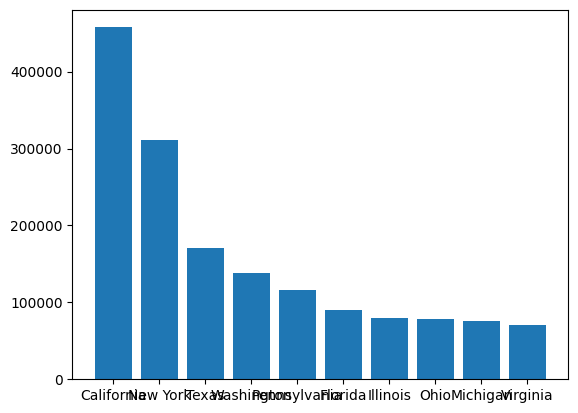

In [8]:
# סכם את סך המכירות לכל מדינה
sales_by_state = df.groupby('State')['Sales'].sum().sort_values(ascending=False)

# הצגה קצרה
print(sales_by_state.head(10))
plt.bar(sales_by_state.index[:10], sales_by_state.values[:10])

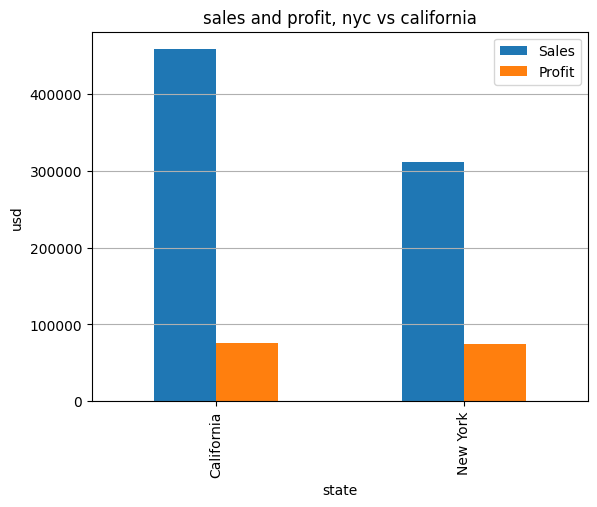

In [9]:
states = ['New York', 'California']
df_filtered = df[df['State'].isin(states)]
state_summary = df_filtered.groupby('State')[['Sales', 'Profit']].sum().reset_index()

state_summary.plot(x = 'State', y=['Sales', 'Profit'], kind='bar')
plt.title("sales and profit, nyc vs california")
plt.ylabel("usd")
plt.xlabel("state")
plt.grid(axis='y')
plt.show()


In [11]:
df_ny = df[df['State'] == 'New York']
ny_customers = df_ny.groupby('Customer Name')[['Sales' , 'Profit']].sum()
ny_customers_sorted = ny_customers.sort_values('Sales', ascending=False)
ny_customers_sorted = ny_customers.sort_values('Profit', ascending=False)
top_customer = ny_customers_sorted.head(5)
print(top_customer)


                      Sales     Profit
Customer Name                         
Tom Ashbrook      13723.498  4599.2073
Keith Dawkins      5854.194  2510.8903
Karen Daniels      6241.282  2283.0463
Nathan Mautz       4821.292  2247.1904
Tom Boeckenhauer   6999.960  2239.9872


In [12]:
df_profitability = df.groupby('State')[['Sales', 'Profit']].sum().reset_index()
df_profitability['Profitability'] = df_profitability['Profit'] / df_profitability['Sales']
df_profitability.sort_values('Profitability', ascending=False, inplace=True)
df_profitability


,State,Sales,Profit,Profitability
7,District of Columbia,2865.0200,1059.5893,0.369837
6,Delaware,27451.0690,9977.3748,0.363460
21,Minnesota,29863.1500,10823.1874,0.362426
17,Maine,1270.5300,454.4862,0.357714
2,Arkansas,11678.1300,4008.6871,0.343264
12,Indiana,53555.3600,18382.9363,0.343251
9,Georgia,49095.8400,16250.0433,0.330986
24,Montana,5589.3520,1833.3285,0.328004
37,Rhode Island,22627.9560,7285.6293,0.321975
20,Michigan,76269.6140,24463.1876,0.320746


In [13]:
customer_profit = df_filtered.groupby('Customer Name')[['Profit']].sum().reset_index()
customer_profit.sort_values('Profit' , ascending=False , inplace=True)
customer_profit['Cumulative Profit'] = customer_profit['Profit'].cumsum()
total_profit = customer_profit['Profit'].sum()
customer_profit['Cumulative %'] = customer_profit['Cumulative Profit'] / total_profit
num_customers = len(customer_profit)
top_20_percent = int(0.2 * num_customers)

top_20 = customer_profit.head(top_20_percent)
share_of_profit = top_20['Profit'].sum() / total_profit

print(f"Top 20% of customers contribute {share_of_profit:.2%} of the total profit.")


Top 20% of customers contribute 68.55% of the total profit.


In [33]:
top_20_city = df_filtered.groupby('City')[['Sales']].sum().reset_index()
top_20_city.sort_values('Sales' , ascending=False , inplace=True)
print(top_20_city.head(20))

             City        Sales
49  New York City  256368.1610
39    Los Angeles  175851.3410
72  San Francisco  112669.0920
71      San Diego   47521.0290
38     Long Beach   13455.0300
6         Buffalo    9063.4960
0         Anaheim    7986.8700
23         Fresno    7888.5285
95        Yonkers    7657.6660
67     Sacramento    7311.2780
74       San Jose    6071.2290
64      Rochester    6017.1300
51        Oakland    5964.4180
5       Brentwood    5090.1140
28      Jamestown    4708.7900
52      Oceanside    4350.7380
78  Santa Barbara    4289.2340
55       Pasadena    4112.6880
91      Watertown    4044.9980
92    Westminster    3826.6460


In [16]:
top_20_profit_city = df_filtered.groupby('City')[['Profit']].sum().reset_index()
top_20_profit_city.sort_values('Profit' , ascending=False , inplace=True)
print(top_20_profit_city.head(20))

                City      Profit
49     New York City  62036.9837
39       Los Angeles  30440.7579
72     San Francisco  17507.3854
71         San Diego   6377.1960
95           Yonkers   2767.7557
38        Long Beach   2108.9306
67        Sacramento   2069.6859
28         Jamestown   1285.7715
0            Anaheim   1234.0036
64         Rochester   1223.2151
5          Brentwood   1216.8104
74          San Jose   1216.0579
27         Inglewood   1026.6960
6            Buffalo    992.8791
23            Fresno    948.2681
91         Watertown    907.0072
26  Huntington Beach    880.0392
77         Santa Ana    836.7465
51           Oakland    834.1029
52         Oceanside    772.6799


In [17]:
set(top_20_city) & set(top_20_profit_city)
set(top_20_city) - set(top_20_profit_city)


{'Sales'}

In [20]:
city_summary = df.groupby('City')[['Sales', 'Profit']].sum().reset_index()
city_summary['Profitability'] = city_summary['Profit'] / city_summary['Sales']
city_summary.sort_values('Profitability', ascending=False, inplace=True)
city_summary.head(20)


,City,Sales,Profit,Profitability
22,Atlantic City,23.360,11.6800,0.500000
171,Grand Island,15.960,7.9800,0.500000
326,New Brunswick,14.770,7.1567,0.484543
468,Summerville,406.940,196.9132,0.483888
201,Holland,137.860,66.6588,0.483525
12,Antioch,19.440,9.3312,0.480000
112,Davis,32.400,15.5520,0.480000
421,Royal Oak,35.340,16.9632,0.480000
257,Lindenhurst,55.480,26.6304,0.480000
48,Bozeman,43.660,20.8106,0.476651


In [26]:
top_20_profit_costumers = df_filtered.groupby('Customer Name')[['Sales']].sum().reset_index()
top_20_profit_costumers.sort_values('Sales' , ascending=False , inplace=True)
print(top_20_profit_costumers.head(20))

           Customer Name       Sales
664         Tom Ashbrook  13723.4980
389         Ken Lonsdale   8716.6300
606          Seth Vernon   8262.6300
663         Todd Sumrall   7744.9160
221         Edward Hooks   7736.5960
534         Peter Fuller   7678.2280
305            Jane Waco   7381.8900
368       Karen Ferguson   7182.7660
665     Tom Boeckenhauer   7170.8320
533            Pete Kriz   6883.0860
380        Keith Dawkins   6861.3140
275            Greg Tran   6783.6240
367        Karen Daniels   6566.9820
510           Nora Preis   6453.1185
434  Maribeth Schnelling   6433.4980
502        Nick Crebassa   6275.4760
151          Clay Ludtke   5559.1340
402       Lena Creighton   5456.8940
497         Nathan Mautz   5369.7540
154     Corinna Mitchell   5345.2080


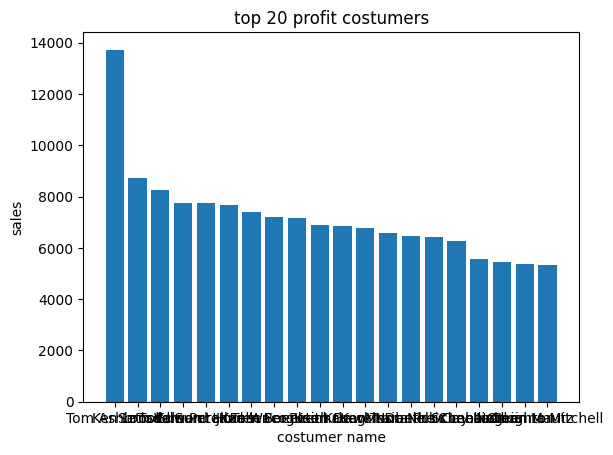

In [32]:
plt.bar(top_20_profit_costumers['Customer Name'].head(20), top_20_profit_costumers['Sales'].head(20))
plt.title('top 20 profit costumers')
plt.xlabel('costumer name')
plt.ylabel('sales')
plt.show()

In [31]:
customer_sales = df_filtered.groupby('Customer Name')[['Sales']].sum().reset_index()
customer_sales.sort_values('Sales' , ascending=False , inplace=True)

customer_sales['Cumulative sales'] = customer_sales['Sales'].cumsum()
total_sales = customer_sales['Sales'].sum()
customer_sales['Cumulative %'] = customer_sales['Cumulative sales'] / total_sales

num_customers = len(customer_sales)
top_20_percent_sales = int(0.2 * num_customers)

top_20_sales = customer_sales.head(top_20_percent_sales)
share_of_sales = top_20_sales['Sales'].sum() / total_sales

print(f"Top 20% of customers contribute {share_of_sales:.2%} of the total sales.")


Top 20% of customers contribute 61.43% of the total sales.


🟢 High-Priority Cities for Marketing Investment

Cities like New York City, Los Angeles, and San Francisco stand out as top performers in both total sales and profit. These markets not only generate high revenue but also yield substantial profits, making them ideal candidates for increased marketing efforts. Other strong candidates include San Diego, Sacramento, Brentwood, and Yonkers, all of which show consistent performance across both metrics.

🟡 Emerging High-Profitability Markets

Cities such as Atlantic City, Grand Island, and New Brunswick demonstrate exceptionally high profitability (up to 50%), despite lower total sales volumes. These locations may represent niche markets with strong margins and could benefit from targeted marketing campaigns to scale.

🔴 Caution: High Sales ≠ High Profitability

While most of the top sales cities are also among the most profitable, it is essential to monitor profit margins continuously. Cities with high sales but weak profitability (not observed in the current top 20) may require pricing strategy adjustments or cost optimization before further investment.

